In [103]:
import pandas as pd
import matplotlib.pyplot as plt

## Analisis
# 1. Rata Rata Umur Setiap Gender
# 2. Tahun dan Jumlah Subscription nya
# 3. Berapa Banyak Pelanggan Setiap Subscription Type
# 4. Rerata Watch Time setiap Satisfaction Score
# 5. Jumlah Customers Sesuai Gender


In [104]:
df = pd.read_csv('streaming_feedback_clean.csv')
df

,User_ID,Nama,Email,Gender,Age,Subscription_Date,Subscription_Type,Monthly_Fee,Watch_Time_Hours,Satisfaction_Score,Feedback_Text
0,U-1,Budi,Unknown,Male,20.0,2022-01-01,Basic,50000,Unknown,Unknown,could be better
1,U-3,Eka,user2@example.com,Female,23.0,2021-12-15,Unknown,Unknown,5.0,Very Bad,terrible!!
2,U-6,Citra,user5@example.com,Female,22.0,2022-02-10,Basic,50000,Unknown,Unknown,AWESOME!!
3,U-10,Gina,user9@example.com,Female,25.0,2021-12-15,Basic,50000,1.0,Very Bad,could be better
4,U-20,Unknown,user19@example.com,Male,23.0,2022-02-10,Premium,100000,15.0,Very Bad,terrible!!
...,...,...,...,...,...,...,...,...,...,...,...
72,U-290,Fajar,user289@example.com,Unknown,24.0,2021-12-15,Basic,50000,1.0,Unknown,great service
73,U-293,Hadi,user292@example.com,Unknown,24.0,2022-01-01,Free,0,Unknown,Unknown,terrible!!
74,U-294,Budi,user293@example.com,Female,24.0,2021-12-15,Basic,50000,15.0,Good,great service
75,U-297,Dina,user296@example.com,Unknown,23.0,2022-02-10,Free,0,5.0,Unknown,Unknown


Text(0.5, 1.0, 'Age per Gender')

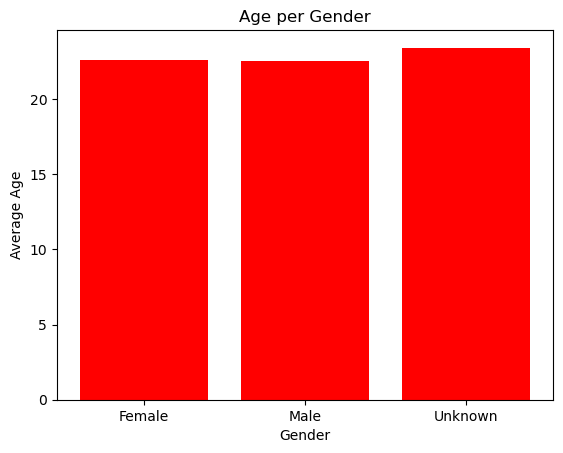

In [105]:
average_age = df.groupby(['Gender'])['Age'].mean().round(1).reset_index()

plt.bar(average_age['Gender'], average_age['Age'], color='r')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Age per Gender')

Text(0.5, 1.0, '2021-2022 Tren')

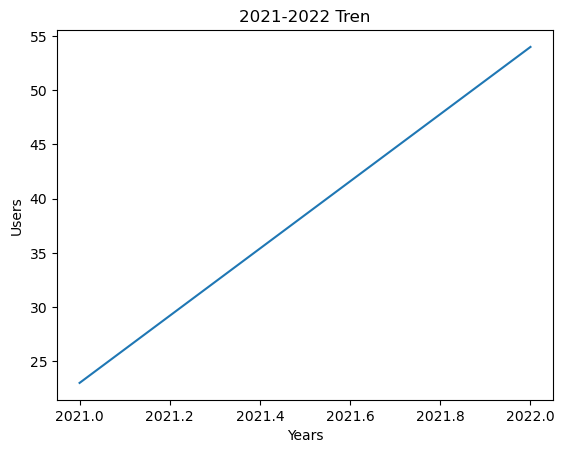

In [106]:
copy_df = df.copy()
copy_df['Subscription_Date'] = pd.to_datetime(copy_df['Subscription_Date'])
copy_df['Years'] = copy_df['Subscription_Date'].dt.year
year_customers = copy_df.groupby(['Years'])['User_ID'].count().reset_index()

plt.plot(year_customers['Years'], year_customers['User_ID'])
plt.xlabel('Years')
plt.ylabel('Users')
plt.title('2021-2022 Tren')

Text(0.5, 1.0, 'Numbers of Subscription Type')

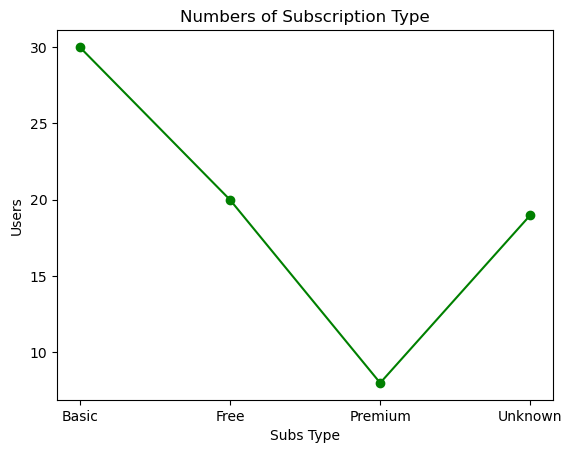

In [107]:
subs_type = df.groupby(['Subscription_Type'])['User_ID'].count().reset_index()

plt.plot(subs_type['Subscription_Type'], subs_type['User_ID'], color='green', marker='o')
plt.xlabel('Subs Type')
plt.ylabel('Users')
plt.title('Numbers of Subscription Type')

Text(0.5, 1.0, 'Rating per Average Watchtime')

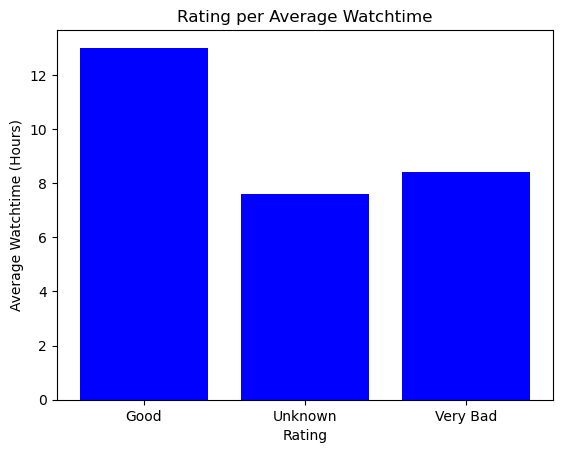

In [108]:
copy_df['Watch_Time_Hours'] = pd.to_numeric(copy_df['Watch_Time_Hours'], errors='coerce')
average_watchtime = copy_df.groupby(['Satisfaction_Score'])['Watch_Time_Hours'].mean().reset_index()

plt.bar(average_watchtime['Satisfaction_Score'], average_watchtime['Watch_Time_Hours'], color='blue')
plt.xlabel('Rating')
plt.ylabel('Average Watchtime (Hours)')
plt.title('Rating per Average Watchtime')

Text(0.5, 1.0, 'Total Customers per Gender')

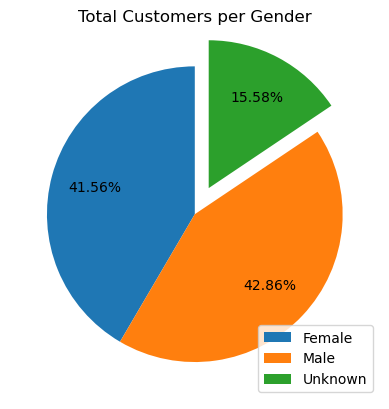

In [109]:
value_gender = df.groupby(['Gender'])['User_ID'].count().reset_index()
explode = []

plt.pie(value_gender['User_ID'], labels=None, explode=[0,0,0.2],
        autopct='%.2f%%', pctdistance=0.7, startangle=90)
plt.legend(labels=value_gender['Gender'])
plt.title('Total Customers per Gender')